# Example 3: Binary Mixture with a Tangent Pinch

#### A mixture of Benzene and Ethylenediamine has an additional constraint on the Reflux Ratio due to a pinch point on the equilibrium curve

In [1]:
## IMPORT NECESSARY LIBRARIES ##
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from distillation.DistillationBinary import DistillationModelBinary
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from thermo_models.VLEEmpiricalModel import *
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
import matplotlib.pyplot as plt


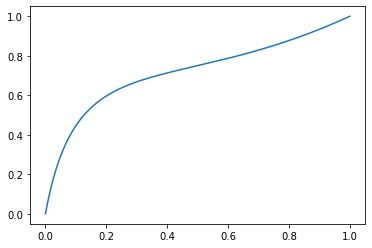

In [7]:

#Define empirical relationship
def xtoy(x):
    a, b = 9, -0.6
    y = a*x/(1+(a-1)*x) +b*x*(1 - x)
    return y

##Probably best to make this a function in DistillationBinary
x_axis = np.linspace(0,1,1000)
y_equib = []
for i in range(len(x_axis)):
    y_equib.append(xtoy(x_axis[i]))
plt.plot(x_axis, y_equib)


In [ ]:
# Create a Raoult's law object
vle_model = VLEEmpiricalModelBinary(xtoy,["Benzene","x2"])

# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.999, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0, max=0.5, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=-1, max=1, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
R2_slider =  widgets.FloatSlider(value=1.00, min=0.8, max=1.2, step=0.0001, description='Reflux Ratio:', readout_format='.2f')

def plot_distil_oplines_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_strip_binary(axs[0][0], axs[1][0])
    distillation_model.plot_distil_rect_binary(axs[0][1], axs[1][1])
    distillation_model.plot_distil_binary(axs[0][2], axs[1][2])
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.

def plot_distil_stripping_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed.
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    distillation_model.plot_distil_strip_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # This is essential for the plot to be displayed in the Output widget in Jupyter.
    def plot_distil_rectifying_ex2_demo2(xD=0.95, xB=0.05, R=R2_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 2, figsize=(14, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')

    distillation_model.plot_distil_rect_binary(ax=axs[0, 0], ax_fixed=axs[1, 0])
    distillation_model.plot_distil_rect_binary(ax=axs[0, 1], ax_fixed=axs[1, 1], zoom_factor = 1)
    
    plt.subplots_adjust(hspace=0, wspace=0.4)  # Adjust spacing between subplots
    plt.show()  # Ensure the plot is displayed in Jupyter.

def plot_distil_rectifying_ex2_demo3(xD=0.95, xB=0.05, R=R2_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_rect_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)  
    plt.show()  # Ensure the plot is displayed in Jupyter.
    
out_strip = Output()
out_rect2 = Output()
out_rect3 = Output()
out_oplines = Output()


###  Demo 2: Rectifying Pinch Region

##### The inflection point in the equilibrum curve restricts the range of feasible reflux rations when the Distillate Composition $x_D$ is sufficiently high (set at 0.95 for this Demo).

##### Move the Reflux Ratio to see how it affects the number of stages near the pinch point.

In [ ]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex2_demo2, xD=0.95, xB=0.05, R=R2_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect2:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex2_demo2(xD=0.95, xB=0.05, R=R2_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([R2_slider, rect_button, out_rect2])
display(layout)

### Demo 3: Low Distillate Purity

##### While the Reflux Ratio may seem like the paramter that determines feasability, the Distillate Composition $x_D$ can also determine feasability.

##### Here $x_D$ is set to equal 0.80, making the tangent pinch no longer a concern. 

In [ ]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex2_demo3, xD=0.80, xB=0.05, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect3:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex2_demo3(xD=0.80, xB=0.05, R=R1_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([R1_slider, rect_button, out_rect3])
display(layout)

### Demo 4: Full Distillation Column

##### Here the Stripping and Rectifying Lines are both shown and the $x_D$ and $x_B$ values can be changed in addition to the Reflux Ratio

##### For the full column, green operating lines indicate feasable parameters.  Black lines indicate an infeasability caused by a tangent pinch.  And red operating lines indicate another infeasability.

In [ ]:
# Create your interactive widget but don't display it
oplines_plot = interactive(plot_distil_oplines_ex2, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_oplines_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_oplines_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

oplines_button = Button(description='Generate Oplines Plot')
oplines_button.on_click(on_oplines_button_click)

layout_oplines = VBox([HBox(oplines_plot.children[:-1]), oplines_button, out_oplines])
display(layout_oplines)